In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(df.info())
print(df.describe())
print('missing values:\n',df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

## One-Hot encoder by padnas dummies

In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)

## Features and target

In [7]:
X = df_encoded.drop('charges', axis = 1)
y = df_encoded['charges']

## standardlize data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [10]:
sc_train = StandardScaler()
X_train_scaled = sc_train.fit_transform(X_train)
sc_test = StandardScaler()
X_test_scaled = sc_test.fit_transform(X_test)

## SVR modeling

In [12]:
svr = SVR(kernel='rbf')
param_grid={
    'C':[1,10,100],
    'gamma':['scale',0.1,1],
    'epsilon':[0.1,0.2,0.5]
}
grid_search = GridSearchCV(svr, param_grid, cv=3,scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'epsilon': [0.1, 0.2, 0.5],
                         'gamma': ['scale', 0.1, 1]},
             scoring='r2')

In [13]:
## best modeling parameters
best_svr = grid_search.best_estimator_
print("best modeling parameters: ", grid_search.best_estimator_)


best modeling parameters:  SVR(C=100, epsilon=0.5, gamma=0.1)


In [14]:
y_pred = best_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

MSE: 165731457.53
R² Score: -0.0984


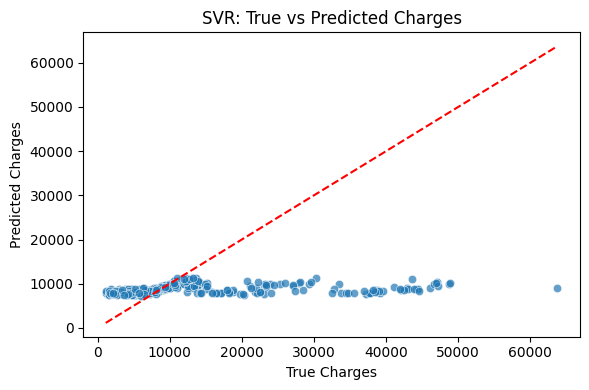

In [15]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("True Charges")
plt.ylabel("Predicted Charges")
plt.title("SVR: True vs Predicted Charges")
plt.tight_layout()
plt.show()

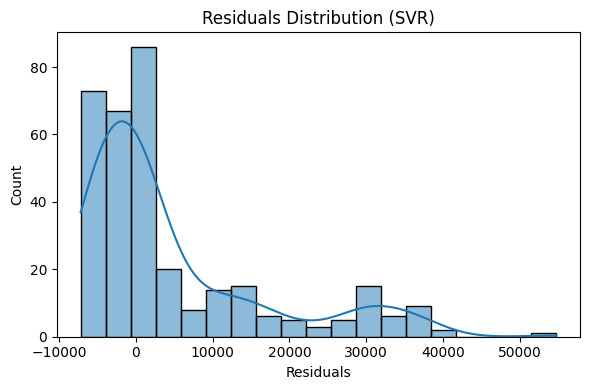

In [16]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution (SVR)")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()